In [1]:
import numpy as np
import sklearn
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, time
from dateutil import tz
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
import matplotlib.dates as mdates
import seaborn as sns
import pytz, datetime

MergeListe = []

%matplotlib inline

# Part I - Reading Weather Data

## Reading the weather data files and merging them into one Dataframe

### Important note: all datasets have to be stored in the same repository

1. Import the Data in Panda Dataframe
2. Rename columns
3. Choose relevant time frame
3. Put df into the MergeList

### Importing the air temperature data in °C

In [2]:
#importing only relevant columns
Temp_Dataset = pd.read_csv("Temperatur_tu_stunde_19810101_20181231_01420.txt", 
                header = 0,
                names = ["MeasuringStation",
                        "DateTime",
                        "QN_9",
                        "Temperature",
                        "RelativeAirHumidity",
                        "eor"], 
                sep=";",
                decimal=".",
                usecols=["DateTime","Temperature","RelativeAirHumidity"])

#slicing only the relevant timeframe out of "DateTime"
Temp_Dataset = Temp_Dataset[Temp_Dataset["DateTime"] >= 2015010100]
Temp_Dataset = Temp_Dataset[Temp_Dataset["DateTime"] <2017010100]

#format the column "DateTime" and add it as a seperate column
Temp_Dataset["FormattedDate"]= pd.to_datetime(Temp_Dataset['DateTime'], format='%Y%m%d%H')

#using "DateTime" as the new index
Ind_Dataset = Temp_Dataset.set_index(["DateTime"])

#append the MergeListe with the indexed Dataframe
MergeListe.append(Ind_Dataset)

print(Ind_Dataset)

            Temperature  RelativeAirHumidity       FormattedDate
DateTime                                                        
2015010100          1.2                100.0 2015-01-01 00:00:00
2015010101          1.1                100.0 2015-01-01 01:00:00
2015010102          1.2                100.0 2015-01-01 02:00:00
2015010103          1.1                100.0 2015-01-01 03:00:00
2015010104          1.1                100.0 2015-01-01 04:00:00
...                 ...                  ...                 ...
2016123119         -3.6                 99.0 2016-12-31 19:00:00
2016123120         -3.5                 99.0 2016-12-31 20:00:00
2016123121         -3.7                 98.0 2016-12-31 21:00:00
2016123122         -3.7                 99.0 2016-12-31 22:00:00
2016123123         -3.9                 99.0 2016-12-31 23:00:00

[17544 rows x 3 columns]


### Importing the sunshine duration data in minutes per hour

In [3]:
#importing only relevant columns, indexing
Sun_Dataset = pd.read_csv("sonne_sd_stunde_19510101_20181231_01420.txt", 
                header = 0,
                index_col="DateTime",
                names = ["MeasuringStation",
                        "DateTime",
                        "QN_7",
                        "SunshineDuration",
                        "eor"], 
                sep=";",
                decimal=".",
                usecols=["DateTime","SunshineDuration"])

#slicing only the relevant timeframe out of "DateTime"
Sun_Dataset = Sun_Dataset[Sun_Dataset.index>= 2015010100]
Sun_Dataset = Sun_Dataset[Sun_Dataset.index <2017010100]

print(Sun_Dataset)

#append the MergeListe with the indexed Dataframe
MergeListe.append(Sun_Dataset)

            SunshineDuration
DateTime                    
2015010103               0.0
2015010104               0.0
2015010105               0.0
2015010106               0.0
2015010107               0.0
...                      ...
2016123116               0.0
2016123117               0.0
2016123118               0.0
2016123119               0.0
2016123120               0.0

[13158 rows x 1 columns]


### Importing the total cloud cover data per hour
#### Cloudiness ranked from 0 to 8; -1 for the case that they sky is not visible

In [4]:
#importing only relevant columns, indexing
Cloud_Dataset = pd.read_csv("Cloudiness_n_stunde_19490101_20181231_01420.txt", 
                header = 0,
                index_col="DateTime",
                names = ["MeasuringStation",
                        "DateTime",
                        "QN_8",
                        "IndexHowMeasurementIsTaken",
                        "TotalCloudCover",
                        "eor"], 
                sep=";",
                decimal=".",
                usecols=["DateTime","TotalCloudCover"])

#slicing only the relevant timeframe out of "DateTime"
Cloud_Dataset = Cloud_Dataset[Cloud_Dataset.index>= 2015010100]
Cloud_Dataset = Cloud_Dataset[Cloud_Dataset.index <2017010100]

print(Cloud_Dataset)

#append the MergeListe with the indexed Dataframe
MergeListe.append(Cloud_Dataset)

            TotalCloudCover
DateTime                   
2015010100                8
2015010101                8
2015010102               -1
2015010103               -1
2015010104               -1
...                     ...
2016123119                8
2016123120                8
2016123121                8
2016123122                8
2016123123                8

[17544 rows x 1 columns]


### Importing the precipitation data in mm per hour

In [5]:
#importing only relevant columns, indexing
Precipitation_Dataset = pd.read_csv("Niederschlag_rr_stunde_19950901_20181231_01420.txt", 
                header = 0,
                index_col="DateTime",
                names = ["MeasuringStation",
                        "DateTime",
                        "QN_8",
                        "PrecipitationHeight",
                        "PrecipitationBool",
                        "FormOfPrecipitation",
                        "eor"], 
                sep=";",
                decimal=".",
                usecols=["DateTime","PrecipitationHeight"])

#slicing only the relevant timeframe out of "DateTime"
Precipitation_Dataset = Precipitation_Dataset[Precipitation_Dataset.index>= 2015010100]
Precipitation_Dataset = Precipitation_Dataset[Precipitation_Dataset.index <2017010100]

print(Precipitation_Dataset)

#append the MergeListe with the indexed Dataframe
MergeListe.append(Precipitation_Dataset)

            PrecipitationHeight
DateTime                       
2015010100                  0.0
2015010101                  0.0
2015010102                  0.0
2015010103                  0.0
2015010104                  0.0
...                         ...
2016123119                  0.0
2016123120                  0.0
2016123121                  0.0
2016123122                  0.0
2016123123                  0.0

[17536 rows x 1 columns]


### Importing the visibility data in meters

In [6]:
#importing only relevant columns, indexing
Visibility_Dataset = pd.read_csv("Sicht_vv_stunde_19490101_20181231_01420.txt", 
                header = 0,
                index_col="DateTime",
                names = ["MeasuringStation",
                        "DateTime",
                        "QN_8",
                        "IndexHowMeasurementIsTaken",
                        "Visibility",
                        "eor"], 
                sep=";",
                decimal=".",
                usecols=["DateTime","Visibility"])
#slicing only the relevant timeframe out of "DateTime"
Visibility_Dataset = Visibility_Dataset[Visibility_Dataset.index>= 2015010100]
Visibility_Dataset = Visibility_Dataset[Visibility_Dataset.index <2017010100]

print(Visibility_Dataset)

#append the MergeListe with the indexed Dataframe
MergeListe.append(Visibility_Dataset)

            Visibility
DateTime              
2015010100        3000
2015010101        1500
2015010102         700
2015010103         600
2015010104         700
...                ...
2016123119        2600
2016123120        1900
2016123121        1900
2016123122        1900
2016123123        1900

[17544 rows x 1 columns]


### Importing the wind speed data in meters per second

In [7]:
#importing only relevant columns, indexing
Wind_Dataset = pd.read_csv("Wind_ff_stunde_19670101_20181231_01420.txt", 
                header = 0,
                index_col="DateTime",
                names = ["MeasuringStation",
                        "DateTime",
                        "QN_3",
                        "MeanWindSpeed",
                        "MeanWindDirection",
                        "eor"], 
                sep=";",
                decimal=".",
                usecols=["DateTime","MeanWindSpeed"])

#slicing only the relevant timeframe out of "DateTime"
Wind_Dataset = Wind_Dataset[Wind_Dataset.index>= 2015010100]
Wind_Dataset = Wind_Dataset[Wind_Dataset.index <2017010100]

print(Wind_Dataset)

#append the MergeListe with the indexed Dataframe
MergeListe.append(Wind_Dataset)

            MeanWindSpeed
DateTime                 
2015010100            1.6
2015010101            1.3
2015010102            1.2
2015010103            1.0
2015010104            0.8
...                   ...
2016123119            1.9
2016123120            1.7
2016123121            1.7
2016123122            2.1
2016123123            1.5

[17544 rows x 1 columns]


## Joining all existing Dataframes (in the MergeListe) by using the indices


In [8]:
#merging the df in the list by using pd.concat
Wetterdaten = pd.concat(MergeListe, axis=1)

#is this necessary?
Wetterdaten['FormattedDate'].dt.strftime('%Y-%m-%d %X')

print (Wetterdaten)
Wetterdaten.describe()

            Temperature  RelativeAirHumidity       FormattedDate  \
DateTime                                                           
2015010100          1.2                100.0 2015-01-01 00:00:00   
2015010101          1.1                100.0 2015-01-01 01:00:00   
2015010102          1.2                100.0 2015-01-01 02:00:00   
2015010103          1.1                100.0 2015-01-01 03:00:00   
2015010104          1.1                100.0 2015-01-01 04:00:00   
...                 ...                  ...                 ...   
2016123119         -3.6                 99.0 2016-12-31 19:00:00   
2016123120         -3.5                 99.0 2016-12-31 20:00:00   
2016123121         -3.7                 98.0 2016-12-31 21:00:00   
2016123122         -3.7                 99.0 2016-12-31 22:00:00   
2016123123         -3.9                 99.0 2016-12-31 23:00:00   

            SunshineDuration  TotalCloudCover  PrecipitationHeight  \
DateTime                                     

,Temperature,RelativeAirHumidity,SunshineDuration,TotalCloudCover,PrecipitationHeight,Visibility,MeanWindSpeed
count,17544.000000,17544.000000,13158.000000,17544.000000,17536.000000,17544.000000,17544.000000
mean,11.376191,74.607216,14.988524,5.371295,-0.565174,33744.128477,3.404178
std,7.857705,19.438818,22.842231,2.622536,25.018618,18481.215006,2.121900
min,-7.200000,16.000000,0.000000,-1.000000,-999.000000,100.000000,0.000000
25%,5.100000,61.000000,0.000000,3.000000,0.000000,18000.000000,1.800000
50%,10.800000,78.000000,0.000000,7.000000,0.000000,35000.000000,2.900000
75%,16.900000,92.000000,28.000000,7.000000,0.000000,50000.000000,4.500000
max,38.100000,100.000000,60.000000,8.000000,19.100000,81900.000000,18.800000


## Cleaning the data and handling error values
### Assigning numerical error values to 'nan' so that statistical methods are not biased

1. Checking the error values of each data set
<ul>
<li>Temperature Error values are -999</li>
<li>Relative Air humidity error values are -999</li>
<li>Sunshine duration error values are -999</li>
<li>Totalcloudcover error values are -999</li>
<li>Precipitationheight error values are -999</li>
<li>Visibility error values are -999</li>
<li>Meanwindspeed error values are non existent</li>
</ul>


2. All -999 in the dataframe are replaced by NaN
<ul>
<li>Only PrecipitationHeight has error values</li>
<li>Create new dataframe to keep original active and have the new one anyway</li>

In [9]:
Wetterdaten_nand = Wetterdaten.replace(-999,np.NaN)

#Option to overwrite dataframe or not
Wetterdaten = Wetterdaten_nand


In [10]:
Wetterdaten.describe()

,Temperature,RelativeAirHumidity,SunshineDuration,TotalCloudCover,PrecipitationHeight,Visibility,MeanWindSpeed
count,17544.000000,17544.000000,13158.000000,17544.000000,17525.000000,17544.000000,17544.000000
mean,11.376191,74.607216,14.988524,5.371295,0.061518,33744.128477,3.404178
std,7.857705,19.438818,22.842231,2.622536,0.429199,18481.215006,2.121900
min,-7.200000,16.000000,0.000000,-1.000000,0.000000,100.000000,0.000000
25%,5.100000,61.000000,0.000000,3.000000,0.000000,18000.000000,1.800000
50%,10.800000,78.000000,0.000000,7.000000,0.000000,35000.000000,2.900000
75%,16.900000,92.000000,28.000000,7.000000,0.000000,50000.000000,4.500000
max,38.100000,100.000000,60.000000,8.000000,19.100000,81900.000000,18.800000


### Handling missing data
1. Description above shows, that only sunshine and precipitation values are missing. Precipitation is only missing 19 values, <br> these will be filled via forward fill, because the missing values are < 0.2% and we assume some weather stability, rather <br> than to assume 0 or mean values. <br> <br>

2. SunshineDuration is always missing 6h from 9 pm until 3 am. Will be imputed with zeros, because the sun typically does not <br> shine at night in Frankfurt.


In [11]:
#Fill precipitation data
Wetterdaten['PrecipitationHeight'].fillna(method='ffill', inplace=True)

#Fill sunshine data
Wetterdaten['SunshineDuration'].fillna(0, inplace=True)

Wetterdaten.describe()
Wetterdaten.iloc[1224:1260]
Wetterdaten.iloc[9000:9049]

,Temperature,RelativeAirHumidity,FormattedDate,SunshineDuration,TotalCloudCover,PrecipitationHeight,Visibility,MeanWindSpeed
DateTime,,,,,,,,
2016011100,5.5,95.0,2016-01-11 00:00:00,0.0,7,0.0,30000,2.7
2016011101,5.7,94.0,2016-01-11 01:00:00,0.0,7,0.0,30000,2.9
2016011102,5.7,91.0,2016-01-11 02:00:00,0.0,6,0.0,30000,3.4
2016011103,4.4,93.0,2016-01-11 03:00:00,0.0,5,0.0,40000,3.4
2016011104,3.8,96.0,2016-01-11 04:00:00,0.0,7,0.0,40000,1.6
2016011105,3.1,97.0,2016-01-11 05:00:00,0.0,7,0.0,30000,1.1
2016011106,3.8,97.0,2016-01-11 06:00:00,0.0,7,0.0,30000,1.6
2016011107,4.3,96.0,2016-01-11 07:00:00,0.0,7,0.0,40000,2.3
2016011108,4.4,96.0,2016-01-11 08:00:00,0.0,8,0.0,17000,2.1


## Choose Formatted Column as new Index

In [12]:
Ind_Wetterdaten = Wetterdaten.set_index(['FormattedDate'])

Ind_Wetterdaten.head()

,Temperature,RelativeAirHumidity,SunshineDuration,TotalCloudCover,PrecipitationHeight,Visibility,MeanWindSpeed
FormattedDate,,,,,,,
2015-01-01 00:00:00,1.2,100.0,0.0,8,0.0,3000,1.6
2015-01-01 01:00:00,1.1,100.0,0.0,8,0.0,1500,1.3
2015-01-01 02:00:00,1.2,100.0,0.0,-1,0.0,700,1.2
2015-01-01 03:00:00,1.1,100.0,0.0,-1,0.0,600,1.0
2015-01-01 04:00:00,1.1,100.0,0.0,-1,0.0,700,0.8


## Save Dataset in csv in order to allow fast access

In [13]:
Ind_Wetterdaten.to_csv("Datenbasis_Weather_beforePlotting.csv")

# Part II - Plotting Weather Data
## Data visualization for data understanding purposes
### Temperature during the two year period

D:\Programme\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


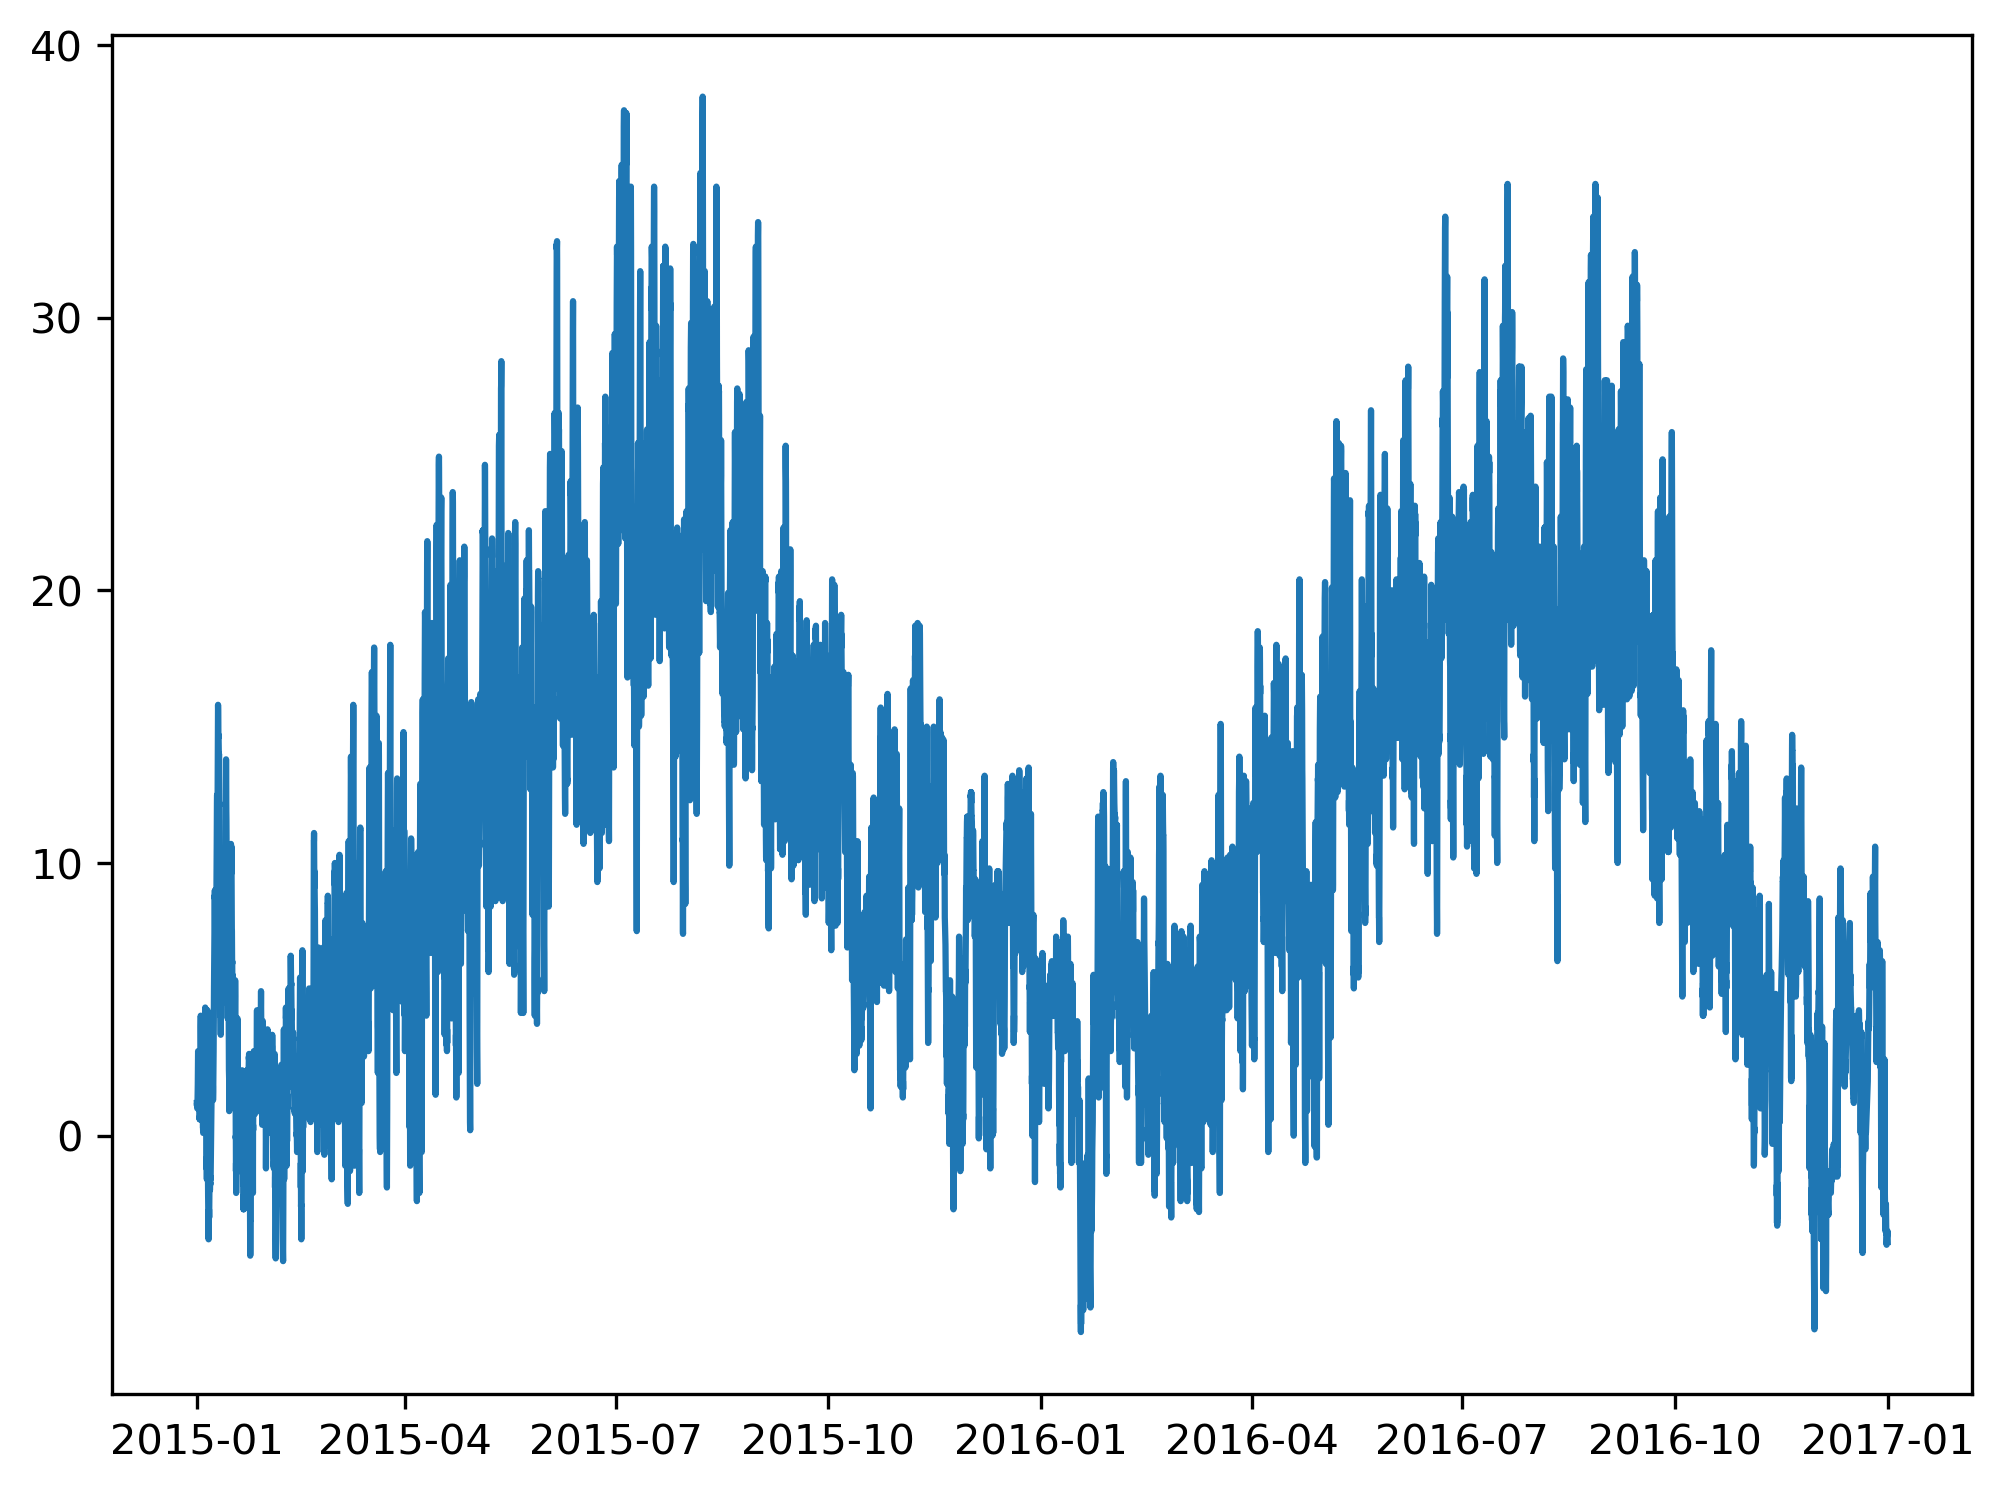

In [14]:
Fig_1 = plt.figure(figsize=(8,6),dpi = 300)
plt.plot(Ind_Wetterdaten.index,Ind_Wetterdaten['Temperature'])
plt.show()

### Development of the temperature on two random days

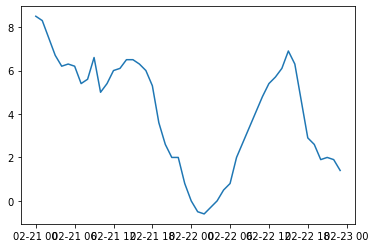

In [15]:
plt.plot(Ind_Wetterdaten.index[1224:1272],Ind_Wetterdaten['Temperature'][1224:1272])
plt.show()

### Development of the precipitation on two random days

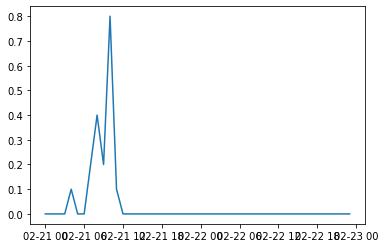

In [16]:
plt.plot(Ind_Wetterdaten.index[1224:1272],Ind_Wetterdaten['PrecipitationHeight'][1224:1272])
plt.show()

### Histogramm of the temperature

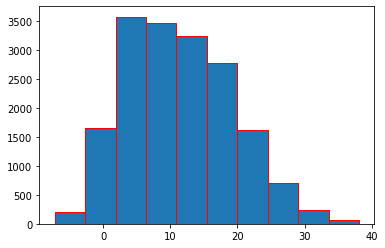

In [17]:
plt.hist(Ind_Wetterdaten['Temperature'], bins=10, edgecolor='red')
plt.show()

### Using the Pearson Correlation
#### Source: https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b 

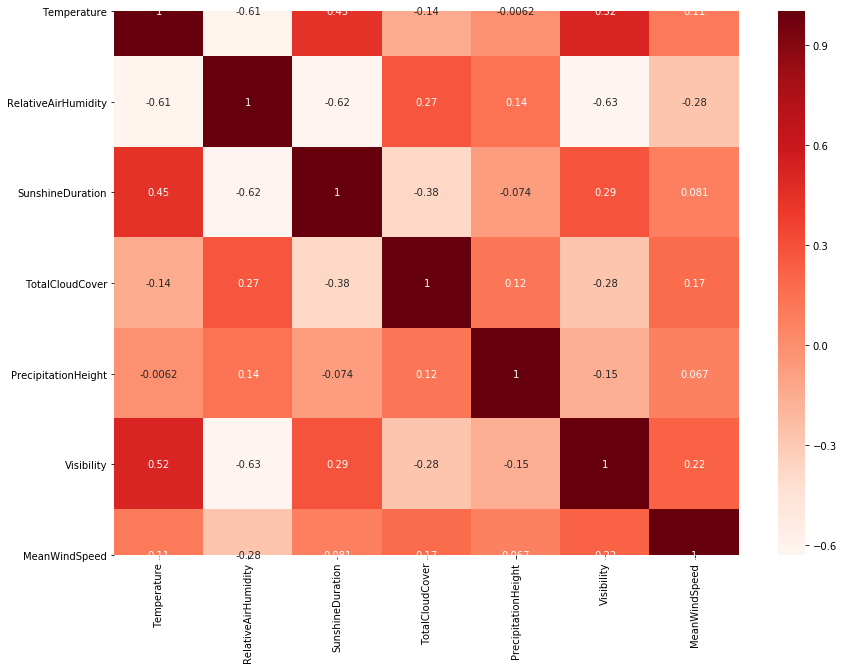

In [18]:
plt.figure(figsize=(14,10))
cor = Ind_Wetterdaten.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Creating a new dataframe with only the relevant columns and all rows for now

Die Gründe warum wir Sunshine Duration, Visibility und RelativeAirHumidity raus nehmen

In [19]:
Rel_Wetterdaten = Ind_Wetterdaten.loc[:, ['Temperature','TotalCloudCover', 'PrecipitationHeight','MeanWindSpeed']]

Rel_Wetterdaten.head()

#exporting new data as csv
Rel_Wetterdaten.to_csv("Datenbasis_Weather_relevant.csv")

# Part III - Reading Bike Data

## Adding the amount of rented bikes per hour to the weather data set

### Reading the csv file and  choosing only relevant data (Frankfurt and Dates 2015 - 2016)

 <font color='red'> 

## NOTE: This part has to be edited when copying everything in one notebook, because it is a bit different to the AA_Descriptive Analysis notebook

## Furthermore the UTC time difference is not considered yet, Sophia is going to work on it soon

In [20]:
#reading csv file
booking_set = pd.read_csv("OPENDATA_BOOKING_CALL_A_BIKE.csv", 
                delimiter=';',
                usecols = ["DATE_BOOKING", "CITY_RENTAL_ZONE"],)

#only using the entries that include "Frankfurt"
booking_set_frankfurt = booking_set[booking_set['CITY_RENTAL_ZONE'].str.contains('Frankfurt')]

#only using the column DATE_BOOKING
booking_set_frankfurt = booking_set_frankfurt.loc[:,['DATE_BOOKING']]

#drop all rows that have empty values (NaN values)
booking_set_frankfurt = booking_set_frankfurt.dropna(axis=0)

#sort the data after the date, ascending
booking_set_frankfurt.sort_values(['DATE_BOOKING'], axis=0, 
                 ascending=True, inplace=True)

#format the column to datetime
booking_set_frankfurt['DATE_BOOKING']= pd.to_datetime(booking_set_frankfurt['DATE_BOOKING'], format='%Y-%m-%d %H')

#only use relevant time frame
start_date_20152016 = '2015-01-01 00:00:00'
end_date_20152016 = '2016-12-31 23:59:59'
filtered_dates_20152016 = (booking_set_frankfurt['DATE_BOOKING'] >= start_date_20152016) & (booking_set_frankfurt['DATE_BOOKING'] <= end_date_20152016)
booking_set_frankfurt_20152016 = booking_set_frankfurt.loc[filtered_dates_20152016]
booking_set_frankfurt_20152016

print (booking_set_frankfurt_20152016)


                DATE_BOOKING
4284612  2015-01-01 00:21:22
4285336  2015-01-01 00:30:20
4285873  2015-01-01 00:42:51
4286542  2015-01-01 01:00:19
4286567  2015-01-01 01:00:47
...                      ...
14613160 2016-12-31 23:13:00
14613511 2016-12-31 23:23:28
14612056 2016-12-31 23:24:03
14615815 2016-12-31 23:28:04
14612244 2016-12-31 23:40:33

[1431643 rows x 1 columns]


### Removing the minutes of the time stamp by using the .floor function
 <font color='red'> 
    
## An dieser Stelle müsste die Konvertierung des Zeitformats in UTC passieren. Also bevor die Stunde abgeschnitten wird

In [21]:
booking_set_frankfurt_20152016['DATE_BOOKING'] = pd.to_datetime(booking_set_frankfurt_20152016['DATE_BOOKING']).dt.floor('h')

print (booking_set_frankfurt_20152016)

                DATE_BOOKING
4284612  2015-01-01 00:00:00
4285336  2015-01-01 00:00:00
4285873  2015-01-01 00:00:00
4286542  2015-01-01 01:00:00
4286567  2015-01-01 01:00:00
...                      ...
14613160 2016-12-31 23:00:00
14613511 2016-12-31 23:00:00
14612056 2016-12-31 23:00:00
14615815 2016-12-31 23:00:00
14612244 2016-12-31 23:00:00

[1431643 rows x 1 columns]


D:\Programme\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


### Use the column "DATE_BOOKING" as Index

In [22]:
Ind_Bookings = booking_set_frankfurt_20152016.set_index(['DATE_BOOKING'])

print (Ind_Bookings)

Empty DataFrame
Columns: []
Index: [2015-01-01 00:00:00, 2015-01-01 00:00:00, 2015-01-01 00:00:00, 2015-01-01 01:00:00, 2015-01-01 01:00:00, 2015-01-01 01:00:00, 2015-01-01 01:00:00, 2015-01-01 01:00:00, 2015-01-01 01:00:00, 2015-01-01 01:00:00, 2015-01-01 01:00:00, 2015-01-01 01:00:00, 2015-01-01 01:00:00, 2015-01-01 01:00:00, 2015-01-01 02:00:00, 2015-01-01 02:00:00, 2015-01-01 02:00:00, 2015-01-01 02:00:00, 2015-01-01 02:00:00, 2015-01-01 02:00:00, 2015-01-01 02:00:00, 2015-01-01 02:00:00, 2015-01-01 02:00:00, 2015-01-01 02:00:00, 2015-01-01 02:00:00, 2015-01-01 02:00:00, 2015-01-01 02:00:00, 2015-01-01 02:00:00, 2015-01-01 02:00:00, 2015-01-01 03:00:00, 2015-01-01 03:00:00, 2015-01-01 03:00:00, 2015-01-01 03:00:00, 2015-01-01 03:00:00, 2015-01-01 03:00:00, 2015-01-01 03:00:00, 2015-01-01 03:00:00, 2015-01-01 03:00:00, 2015-01-01 03:00:00, 2015-01-01 03:00:00, 2015-01-01 03:00:00, 2015-01-01 03:00:00, 2015-01-01 03:00:00, 2015-01-01 03:00:00, 2015-01-01 03:00:00, 2015-01-01 03:00:00

### Group the Dataframe by its Date (Hour of Booking) to generate a column counting the amount of rentals per hour

In [23]:
Ind_Bookings['Rentals'] =Ind_Bookings.groupby('DATE_BOOKING').size()
Ind_Bookings.groupby('DATE_BOOKING')
print (Ind_Bookings)

                     Rentals
DATE_BOOKING                
2015-01-01 00:00:00        3
2015-01-01 00:00:00        3
2015-01-01 00:00:00        3
2015-01-01 01:00:00       11
2015-01-01 01:00:00       11
...                      ...
2016-12-31 23:00:00        7
2016-12-31 23:00:00        7
2016-12-31 23:00:00        7
2016-12-31 23:00:00        7
2016-12-31 23:00:00        7

[1431643 rows x 1 columns]


### Join the weather and bike data and drop the duplicates

In [30]:
#create a zeitspalte to help identify duplicate rows
Ind_Bookings["zeitspalte"] = Ind_Bookings.index
Ind_Bookings.drop_duplicates(keep = "first", inplace = True)
Ind_Bookings["zeitspalte"].dt.tz_localize('Europe/Berlin', nonexistent = "NaT", ambiguous = "NaT").dt.tz_convert('utc')

Datenbasis = Rel_Wetterdaten.join(Ind_Bookings)
Datenbasis = Datenbasis.loc[:,['Temperature' , 'TotalCloudCover', 'PrecipitationHeight', "MeanWindSpeed", "Rentals"]]

Datenbasis.describe()
print(Datenbasis)
Datenbasis.to_csv("DataBase_WeatherRentalAmount.csv")

                     Temperature  TotalCloudCover  PrecipitationHeight  \
FormattedDate                                                            
2015-01-01 00:00:00          1.2                8                  0.0   
2015-01-01 01:00:00          1.1                8                  0.0   
2015-01-01 02:00:00          1.2               -1                  0.0   
2015-01-01 03:00:00          1.1               -1                  0.0   
2015-01-01 04:00:00          1.1               -1                  0.0   
...                          ...              ...                  ...   
2016-12-31 19:00:00         -3.6                8                  0.0   
2016-12-31 20:00:00         -3.5                8                  0.0   
2016-12-31 21:00:00         -3.7                8                  0.0   
2016-12-31 22:00:00         -3.7                8                  0.0   
2016-12-31 23:00:00         -3.9                8                  0.0   

                     MeanWindSpeed  R

# [Part IV - Playing around a bit by Nina]

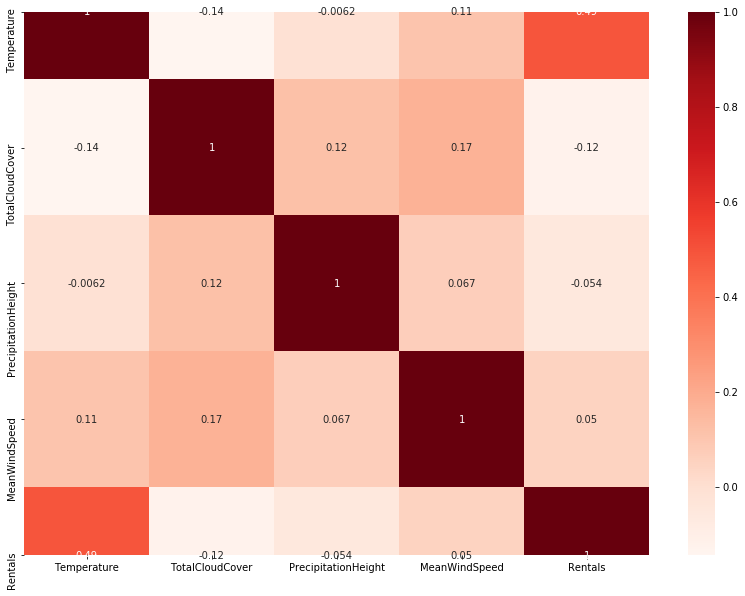

In [28]:
plt.figure(figsize=(14,10))
cor = Datenbasis.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()